# MCMC para Ising 

In [2]:
using PyPlot

INFO: Loading help data...


In [3]:
using Interact

En el notebook anterior, vimos cómo muestrear de una distribución de probabilidad $\pi$ dada, usando el algoritmo de Metropolis, que es un ejemplo de un método de "Markov Chain Monte Carlo" ("Monte Carlo usando cadenas de Markov",  MCMC).
Apliquemos esto al modelo de Ising.

$\newcommand{\ss}{\pmb \sigma}
\newcommand{\tt}{\pmb \tau}$

###[1] Escribe la probabilidad de aceptación, $\alpha(\ss \to \tt)$, para la distribución de Boltzmann, en términos de la diferencia de energías, $\Delta E := E(\tt) - E(\ss)$.

$$\alpha(\sigma \rightarrow \tau)=\min\{1,e^{-\beta \Delta E}\}$$

###[2] En el caso de voltear un solo espín, encuentra una expresión analítica para $\Delta E$, en términos del valor actual del espín que se va a voltear (antes de que se cambie su valor) y los valores de sus espines. 

Como la energía está dada por el producto de espines, en el caso de voltear un espín, se ven afectados los vecinos más cercanos y la energía cambia de signo para cada una de estas contribuciones. Es decir,

$$ E(\tau_{i,j}) = - J(-\sigma_{i,j}\sigma_{i,j-1}-\sigma_{i,j}\sigma_{i,j+1}-\sigma_{i,j}\sigma_{i-1,j}-\sigma_{i,j}\sigma_{i+1,j}=-E(\sigma_{i,j})$$

Donde $E(\sigma_{i,j})$ denota la energía debido al espín en el sitio $(i,j)$ y sus vecinos. Como este espín es el único que cambió,

$$\Delta E = E(\tau)-E(\sigma) = E(\tau_{i,j})-E(\sigma_{i,j})=-2E(\sigma_{i,j})$$

###[3] Así, implementa el algoritmo de Metropolis para simular el modelo de Ising a una temperatura $T$ dada. 

Nota que el resultado de la pregunta [2] muestra que, una vez propuesto un espín por voltear, *no* es necesario voltear el espín para calcular la $\Delta E$, y, por lo tanto, se requiere voltearlo *sólo* si el cambio propuesto resulte ser aceptado. Se puede voltear al modificar la misma configuración.

In [4]:
function conf_aleatoria(n::Int64,m::Int64,p=0.5)
    configuracion=ones(n,m)
    for i in 1:n
        for j in 1:m
            if rand()<=p
                configuracion[i,j]=-1
            end
        end
    end
    return configuracion 
end

conf_aleatoria (generic function with 2 methods)

In [5]:
function flip_one(A::Array{Float64,2},i::Int64,j::Int64)
    A[i,j]*=-1
    A
end

flip_one (generic function with 1 method)

In [6]:
function energia_ij(configuracion::Array{Float64,2},n::Int64,m::Int64,i::Int64,j::Int64)
    -configuracion[i,j]*(configuracion[mod1(i-1,n),j]+configuracion[mod1(i+1,n),j]+
        configuracion[i,mod1(j-1,m)]+configuracion[i,mod1(j+1,m)])/2
end

energia_ij (generic function with 1 method)

In [7]:
function α(configuracion::Array{Float64,2},beta::Float64,n::Int64,m::Int64,i::Int64,j::Int64)
    energia = energia_ij(configuracion,n,m,i,j)
    if energia <=0.0
        delta_energia=-2*energia
        return e^(-beta*delta_energia)
    else
        return 1.0
        #energia_ij(configuracion_new,n,m,i,j)-energia_ij(configuracion,n,m,i,j)
        #min(1,e^(-beta*delta_energia))
    end
end


α (generic function with 1 method)

In [8]:
function aceptar(configuracion::Array{Float64,2},beta::Float64,n::Int64,m::Int64)
    i,j=rand(1:n),rand(1:m)
    alpha=α(configuracion,beta,n,m,i,j)
    #@show alpha
    if rand()<=alpha
        return flip_one(configuracion,i,j)
    else
        return configuracion
    end
end

aceptar (generic function with 1 method)

In [14]:
n=4
m=4
conf=conf_aleatoria(n,m)
println(conf)
aceptar(conf,1.0,n,m)

[-1.0 1.0 -1.0 -1.0
 1.0 -1.0 1.0 -1.0
 -1.0 1.0 1.0 -1.0
 -1.0 1.0 1.0 1.0]
alpha => 0.1353352832366127


4x4 Array{Float64,2}:
 -1.0   1.0  -1.0  -1.0
  1.0  -1.0   1.0  -1.0
 -1.0   1.0   1.0  -1.0
 -1.0   1.0   1.0   1.0

###[4] Durante la simulación, rastrea los valores de la magnetización $M(t)$ y la energía $E(t)$. Dibuja estas cantidades como función del tiempo.

In [9]:
function energia_total(configuracion::Array{Float64,2},n::Int64,m::Int64)
    out=0.0
    for i in 1:n
        for j in 1:m
            out+=-configuracion[i,j]*(configuracion[mod1(i-1,n),j]+configuracion[mod1(i+1,n),j]+
            configuracion[i,mod1(j-1,m)]+configuracion[i,mod1(j+1,m)])
        end
    end
    out/2
end

energia_total (generic function with 1 method)

In [10]:
magnetizacion(A::Array{Float64})=sum(A)

magnetizacion (generic function with 1 method)

In [11]:
function energias_t(beta,n::Int64,m::Int64,t=100)
    out=zeros(t+1)
    config_old=conf_aleatoria(n,m)
    out[1]=energia_total(config_old,n,m)
    for tiempo in 1:t
        config_new=aceptar(config_old,beta,n,m)
        out[tiempo+1]=energia_total(config_new,n,m)
        config_old,config_new=config_new,config_old
    end
    out
end

energias_t (generic function with 2 methods)

In [12]:
function magnetizaciones_t(beta,n::Int64,m::Int64,t)
    out=zeros(t+1)
    config_old=conf_aleatoria(n,m)
    out[1]=magnetizacion(config_old)
    for tiempo in 1:t
        config_new=aceptar(config_old,beta,n,m)
        out[tiempo+1]=magnetizacion(config_new)
        config_old,config_new=config_new,config_old
    end
    out
end

magnetizaciones_t (generic function with 1 method)

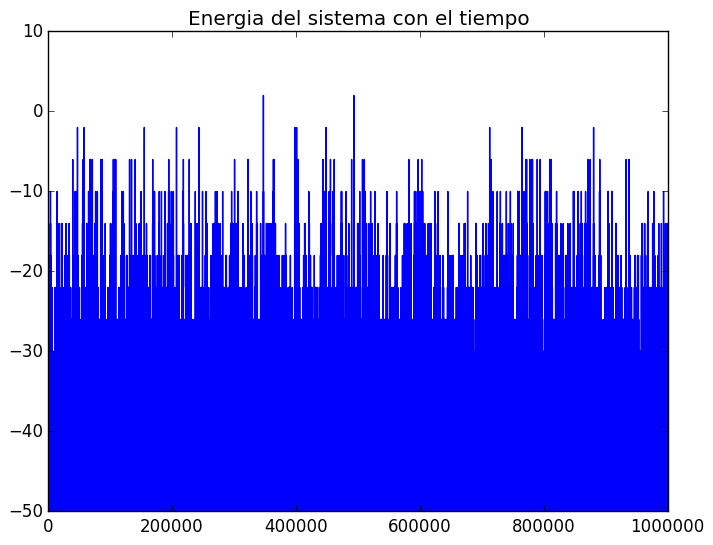

PyObject <matplotlib.text.Text object at 0x7f1ffac30b10>

In [36]:
m=5
n=5
energias=energias_t(1.0,n,m,1_000_000)
plot(energias,markersize=0.5)
title("Energia del sistema con el tiempo")

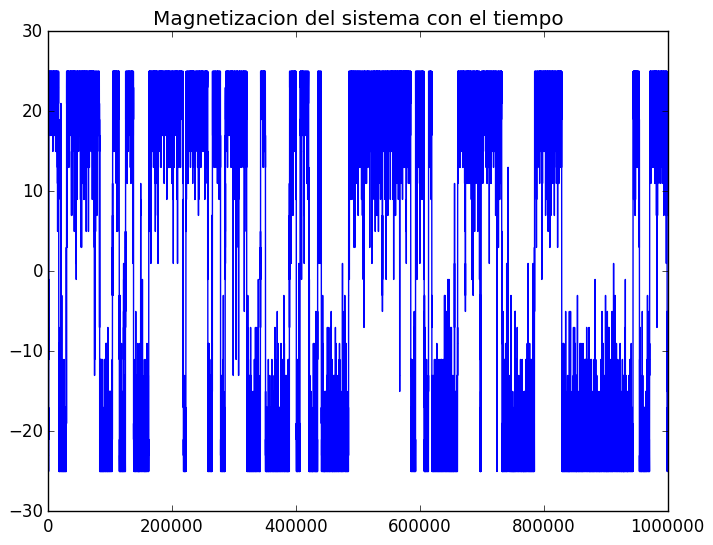

PyObject <matplotlib.text.Text object at 0x7f1ff86ecc90>

In [40]:
magnetizaciones=magnetizaciones_t(1.0,n,m,1_000_000)
plot(magnetizaciones)
title("Magnetizacion del sistema con el tiempo")

###[5] Quisiéramos calcular estimados de valores promedio como $\langle E \rangle_\beta$. Viendo tus gráficas, propón cómo hacer esto e impleméntalo. 

Como ya dejamos al sistema acceder a las configuraciones probables, el conjunto de energías que visita el sistema tiene información acerca de las configuraciones probables y por lo tanto de nuestro ensemble. Además, si el sistema visita una configuración muy estable, se queda ahí y calcula la energía en cada paso que se mantiene ahí, por lo que las energías se pueden repetir paso a paso y por lo tanto están pesadas con su probabilidad.
Por todo esto, un simple promedio con la función mean() nos dará un promedio del estilo:

$$\langle E \rangle_{\beta} = \sum\limits_{\{n\}} W(E_{\{n\}})E_{\{n\}}$$

###[6] Así, calcula $\langle E \rangle_\beta$ para distintos valores de $\beta$ entre $0$ y $5$, poniendo $J = 1$.

In [13]:
function energiapromedio_beta(n::Int64,m::Int64)
    out=zeros(51)
    for i in 1:51
        out[i]=mean(energias_t((i-1)*0.1,n,m,100_000))
    end
    out
end

energiapromedio_beta (generic function with 1 method)

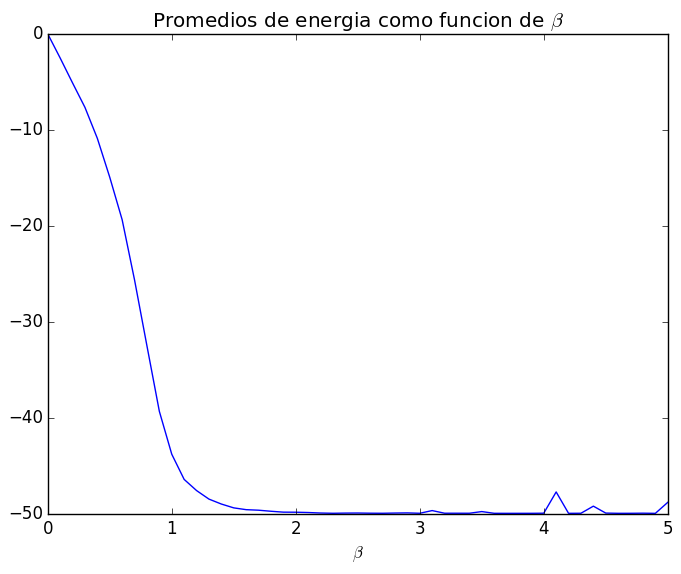

PyObject <matplotlib.text.Text object at 0x7f1ff7db1c90>

In [60]:
promedios=energiapromedio_beta(5,5)
plot([0:0.1:5],promedios)
title(L"Promedios de energia como funcion de $\beta$")
xlabel(L"$\beta$")

Notamos una curva suave que al disminuir la temperatura, los espines se alinean y por tanto la energía promedio
tiende a maximizarse y tiende a 

$$\lim \limits_{\beta \to \infty}\langle E \rangle_\beta = -(2mn)J$$ 

###[7] Haz lo mismo con la magnetización. ¿Por qué no da un resultado interesante? ¿Qué podrías hacer al respecto? Impleméntalo y dibuja las gráficas.

In [14]:
function magnetizacionpromedio_beta(n::Int64,m::Int64)
    out=zeros(51)
    for i in 1:51
        out[i]=mean(magnetizaciones_t((i-1)*0.1,n,m,100_000))
    end
    out
end

magnetizacionpromedio_beta (generic function with 1 method)

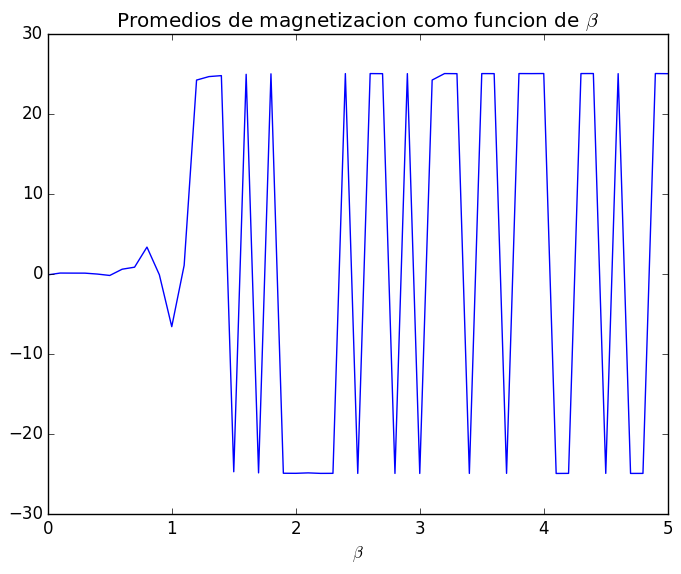

PyObject <matplotlib.text.Text object at 0x7f1ff7e86190>

In [59]:
promediosm=magnetizacionpromedio_beta(5,5)
plot([0:0.1:5],promediosm)
title(L"Promedios de magnetizacion como funcion de $\beta$")
xlabel(L"$\beta$")

Se puede notar que para $\beta$ pequeñas, esto es, $T$ grandes, la magnetización promedia $0$. Al bajar la temperatura, los espines tienden a alinearse. El problema es que se pueden alinear positiva o negativamente sin preferencia alguna y es por eso que la magnetización promedio no nos da mucha información.

Por esto, podríamos graficar el valor absoluto de la magnetización y tal vez nos ayuda a visualizar qué pasa.

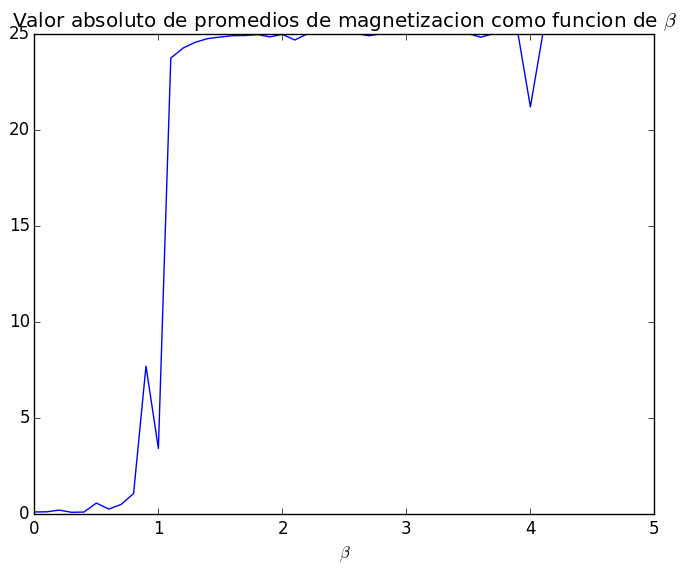

PyObject <matplotlib.text.Text object at 0x7f1ff7f4e810>

In [58]:
plot([0:0.1:5],abs(promediosm))
title(L"Valor absoluto de promedios de magnetizacion como funcion de $\beta$")
xlabel(L"$\beta$")

[8] Cambia gradualmente la temperatura inversa de $5$ a $0$ y haz una animación de algunas **configuraciones** representativas para distintas temperaturas.

In [ ]:
n=5
m=5
t=1000
configs=zeros(6)
fig=figure()
@manipulate for betaa=0:0.5:5
    config_old=conf_aleatoria(n,m);
    withfig(fig) do
    for tiempo in 1:t
        config_new=aceptar(config_old,float(betaa),n,m)
        config_old,config_new=config_new,config_old
    end
    imshow(config_old)
        title(L"Arreglo 'representativo' de espines variando $\beta$ de 0 a 5 en pasos de 0.5")
    end
end

###[9] Interpreta todo esto físicamente. ¿Qué estamos viendo?

Estamos viendo que para temperaturas bajas, es fácil que todos los espines estén alineados después de cierto tiempo y para temperaturas altas, las configuraciones representativas pueden llegar a ser espines aleatoriamente alineados.